# anaconda opencv install 

conda install -c menpo opencv3

conda install -c conda-forge opencv

# read image and segment 

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
img = "/Users/mins/Documents/mv/ps/dataset/Laser_Welding/01_114626-1.jpg"
img = cv2.imread(img)

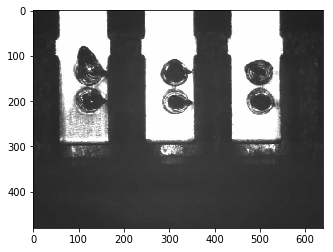

In [3]:
plt.imshow(img)

In [4]:
print(img.shape)

(480, 640, 3)


# detect 6hole

1. check edge

In [5]:
img2 = img.copy()
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 10
maxLineGap = 40
lines = cv2.HoughLinesP(edges,1,np.pi/180,5,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img2,(x1,y1),(x2,y2),(255,0,0),2)

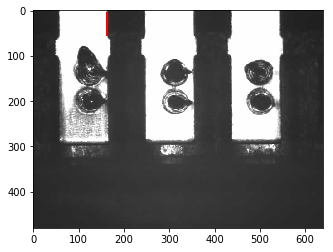

In [6]:
plt.imshow(img2)

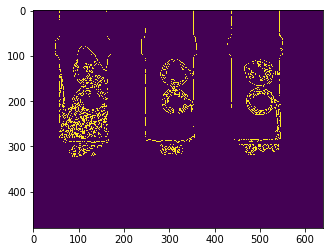

In [7]:
plt.imshow(edges)

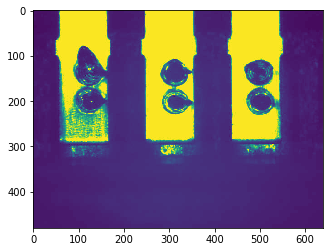

In [8]:
plt.imshow(gray)

2 Detect Bar

img size : 640 * 480<br>
y축 320 이후는 무의미.<br>
혹시 모를 변수를 대비해서 340 이후 절단

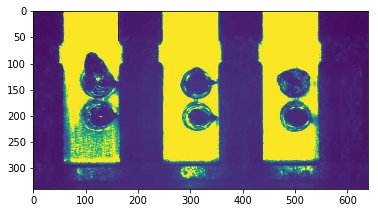

In [9]:
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray = gray[0:340,0:640]
plt.imshow(gray)

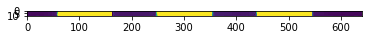

In [10]:
row = gray[0:10,0:640]
plt.imshow(row)

In [11]:
print(row)

[[36 36 36 ..., 34 34 34]
 [36 36 36 ..., 34 34 34]
 [36 36 36 ..., 34 34 34]
 ..., 
 [36 36 36 ..., 34 34 34]
 [34 34 34 ..., 32 32 32]
 [34 34 34 ..., 32 32 32]]


In [12]:
lines = ""
for x in range(0,640,10):
    lines += ",{}".format(row[0,x])
print(lines)

,36,38,38,38,38,40,234,254,254,254,254,254,254,254,254,254,250,44,42,42,46,46,44,44,50,254,254,254,254,254,254,254,254,254,254,254,48,46,46,46,46,44,44,46,254,254,254,254,254,254,254,254,254,254,254,48,38,36,38,38,36,34,34,36


gray 객체를 통해서 보면 30대 값이 어두운 부분, 200대 값이 밝은 부분임을 확인 가능. <br>
gray  이미지의 임의의 y축을 선형적으로 탐색하여 3개의 밝은 부분을 추출

In [13]:
seg = 1
start = []
end = []
onSegment=False
for x in range(0,639):
    if row[0,x] > 200 :
        if onSegment :
            if row [0,x+1] < 200 :
                onSegment = False
                end.append(x)
            continue
        else:
            start.append(x)
            onSegment = True

startArr = np.asarray(start)
endArr = np.asarray(end)
for idx in range(0,len(startArr)):
    print(startArr[idx], endArr[idx])

        

60 161
248 353
439 543


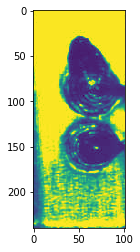

In [14]:
bar1 = gray[50:290,start[0]:end[0]]

plt.imshow(bar1)

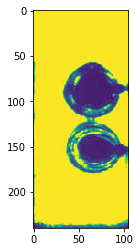

In [15]:
bar2 = gray[50:290,start[1]:end[1]]
plt.imshow(bar2)

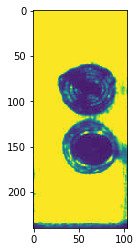

In [16]:
bar3 = gray[50:290,start[2]:end[2]]
plt.imshow(bar3)

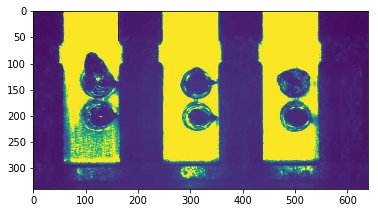

In [17]:
plt.imshow(gray)

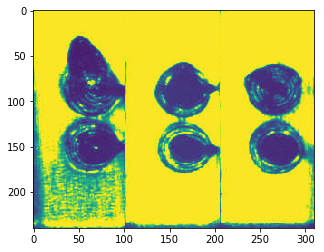

In [18]:
plt.imshow(hstack((bar1, bar2, bar3)))

3 Split Bar

In [19]:
hole1 = bar1[0:120,0:100]
hole4 = bar1[120:240,0:100]

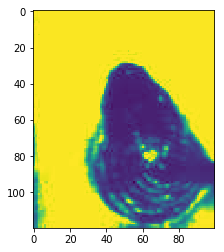

In [20]:
plt.imshow(hole1)

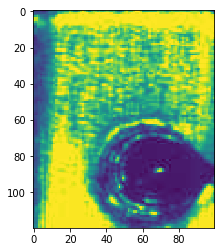

In [21]:
plt.imshow(cv2.flip(hole4,0))

위의 코드를 합침

합쳐서 위의 코드를 함수화 시키면 <br>
name : detect_segment<br>
input : img <br>
output : img1~img6<br>

In [22]:
def detect_segment(img):
    #img gray 변환
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray[0:340,0:640]
    
    #바 추출
    seg = 1
    start = []
    end = []
    onSegment=False
    for x in range(0,639):
        if row[0,x] > 200 :
            if onSegment :
                if row [0,x+1] < 200 :
                    onSegment = False
                    end.append(x)
                continue
            else:
                start.append(x)
                onSegment = True

    startArr = np.asarray(start)
    endArr = np.asarray(end)
    
    bar1 = img[50:290,start[0]:end[0]]
    bar2 = img[50:290,start[1]:end[1]]
    bar3 = img[50:290,start[2]:end[2]]
    
    # 구멍 추출 
    hole1 = bar1[0:120,0:100]
    hole2 = bar2[0:120,0:100]
    hole3 = bar3[0:120,0:100]
    hole4 = cv2.flip(bar1[120:240,0:100],0)
    hole5 = cv2.flip(bar2[120:240,0:100],0)
    hole6 = cv2.flip(bar3[120:240,0:100],0)
    return hole1,hole2,hole3,hole4,hole5,hole6   
    

In [23]:
hole1,hole2,hole3,hole4,hole5,hole6 = detect_segment(img)

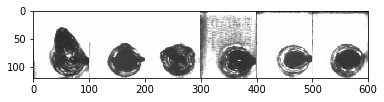

In [24]:
plt.imshow(hstack((hole1,hole2,hole3,hole4,hole5,hole6)))

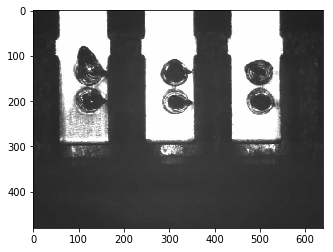

In [25]:
plt.imshow(img)

In [26]:
img2 = cv2.imread("/Users/mins/Documents/mv/ps/dataset/Laser_Welding/01_144812-6.jpg")

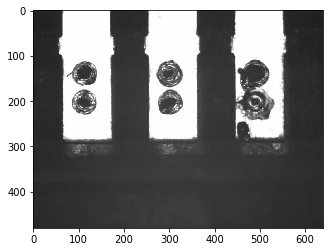

In [27]:
plt.imshow(img2)

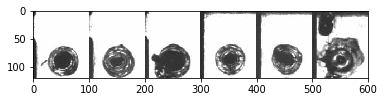

In [28]:
hole1,hole2,hole3,hole4,hole5,hole6 = detect_segment(img2)
plt.imshow(hstack((hole1,hole2,hole3,hole4,hole5,hole6)))

In [31]:
img3=cv2.imread("/Users/mins/Documents/mv/ps/dataset/Laser_Welding/22_092157-5.jpg")

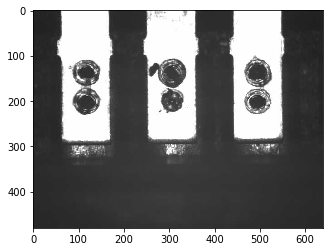

In [32]:
plt.imshow(img3)

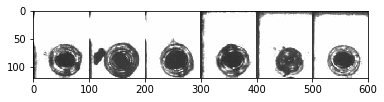

In [33]:
hole1,hole2,hole3,hole4,hole5,hole6 = detect_segment(img3)
plt.imshow(hstack((hole1,hole2,hole3,hole4,hole5,hole6)))